# Model Validation and Selection

 `(Cross-) Validation`, `Model Selection`,`Regularization`,`Training Set`,`Validation Set`,

# Machine Learning: Basic Principles

1. **data points** which are characterized by features $\mathbf{x} \in \mathcal{X}$ and labels $y\in \mathcal{Y}$, 

2. a **hypothesis space** $\mathcal{H}$ consisting of maps ("predictors") $h: \mathcal{X} \rightarrow \mathcal{Y}$ from features $\mathbf{x}\in\mathcal{X}$ to a predicted label $\hat{y}=h(\mathbf{x})\in \mathcal{Y}$ and 

3. a **loss function** (such as squared error loss or the logistic loss), which measures the quality of a predictor. 

In this exercise you will learn a principled approach for **model selection**, i.e., 
- Choose the best (in a certain sense) hypothesis space $\mathcal{H}$ out of a whole list of different hypothesis spaces $\mathcal{H}^{(1)},\mathcal{H}^{(2)},\ldots$.  

### Using different data points 

- for choosing a predictor $\hat{h}^{(d)}$ out of a hypothesis space $\mathcal{H}^{(d)}$ (via empiricial risk minimization) and 
- for assessing (validating) the quality of the predictor $\hat{h}^{(d)} \in \mathcal{H}^{(d)}$. 

**Data Points**
- The data points used for choosing (learning) the predictor $\hat{h}^{(d)}$ out of $\mathcal{H}^{(d)}$ is referred to as the **training set** $\mathbb{X}^{(\rm train)}$,
- while the data points used to assess the quality of $\hat{h}^{(d)}$ is referred to as the **validation set** or **cross-validation set** $\mathbb{X}^{(\rm val)}$.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [18]:
#Read the data
df=pd.read_csv('BTC_ETH_round4.csv')
x=df.Bitcoin.values #Bitcoin values
y=df.Ethereum.values #Ethereum values

df.head()

,Unnamed: 0,Bitcoin,Ethereum
0,0,0.000000,0.000592
1,1,0.013129,0.000419
2,2,0.010504,0.010530
3,3,0.017020,0.009649
4,4,0.038061,0.038112


In [19]:
#Reshape the data. 
print(f'Current Shape \nx: {x.shape} \ny: {y.shape} \n')
#This is really important for the matrix multiplications later on!
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

print(f'New Shape \nx: {x.shape} \ny: {y.shape}')

Current Shape 
x: (20,) 
y: (20,) 

New Shape 
x: (20, 1) 
y: (20, 1)


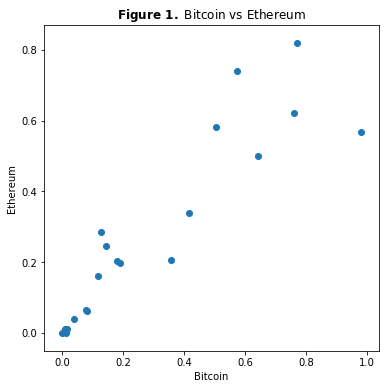

20


In [20]:
#Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x, y) 
plt.title(r'$\bf{Figure\ 1.}$ Bitcoin vs Ethereum')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.show()
print(len(x))

The relation between the Ethereum price $y$ and the Bitcoin price $x$ is **highly non-linear**. 

Therefore it is useful to consider a hypothesis space which is constituted by **polynomial functions of degree $d$**: 

\begin{equation}
\mathcal{H}^{(d)}_{\rm poly} = \{ h^{(\mathbf{w})}(\cdot): \mathbb{R} \rightarrow \mathbb{R}: h^{(\mathbf{w})}(x) = \sum_{r=1}^{d+1} w_{r} x^{r-1} \mbox{, with some } \mathbf{w} =(w_{1},\ldots,w_{d+1})^{T} \in \mathbb{R}^{d+1} \}.
\end{equation}  

Polynomial regression is equivalent to combining linear regression with a feature map $$\phi: \mathbb{R} \rightarrow \mathbb{R}^{d+1}$$
In particular, we transform the features $x$ (Bitcoin closing price) of the data points to the feature vector  

\begin{equation}
\phi(x) = (x^{0},\ldots,x^{d})^{T} \in \mathbb{R}^{d+1}.
\label{eq7}
\tag{7}
\end{equation}

Using this new feature vector $\mathbf{x}=\phi(x)$, we can represent any polynomial map $h \in \mathcal{H}^{(d)}_{\rm poly}$ as 

\begin{equation} 
h^{(\mathbf{w})}(x) = \mathbf{w}^{T} \phi(x) \mbox{ with some weight vector } \mathbf{w} \in \mathbb{R}^{d+1}.
\label{eq8}
\tag{8}
\end{equation}

### Building a training set

Consider a particular choice for the maximum polynomial degree $d=2$. We can find a good polynomial predictor $\hat{h}^{(d)}$ by minimizing the empirical risk over some labeled data points. 

We will use only a subset of the full dataset, the **training set** 

$$
\mathbb{X}^{(\rm train)} = \{ (x^{(2)},y^{(2)}), (x^{(4)},y^{(4)}), (x^{(6)},y^{(6)}),\ldots,(x^{(N)},y^{(N)}) \}$$

### Building a Validation set

This training set $\mathbb{X}^{(\rm train)}$, of size $N_{\rm train} = N/2$, is obtained by selecting every other data point of the original data set $\mathbb{X}$. The remaining data points in $\mathbb{X}$ will be used as the **validation set**:  

\begin{equation} 
\mathbb{X}^{(\rm val)}= \{(x^{(1)},y^{(1)}),(x^{(3)},y^{(3)}),(x^{(19)},y^{(19)})\}.
\end{equation} 

### Optimization Problem

(*Find the $h$ that minimized the training error*)

For each choice of $d$, which corresponds to a particular hypothesis space $\mathcal{H}^{(d)}$, we learn the optimal predcitor $\hat{h}^{(d)}$ by solving 

\begin{align}
\hat{h}^{(d)} & = {\rm arg} \min_{h \in \mathcal{H}^{(d)}_{\rm poly}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - h(x^{(i)})\big)^2. 
\end{align} 

This optimization problem can be rewritten using the paramtrization as

\begin{align}
\hat{\mathbf{w}}^{(d)} & = {\rm arg} \min_{\mathbf{w} \in \mathbb{R}^{d+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - \mathbf{w}^{T}\phi \big(x^{(i)}\big) \big)^2. 
\end{align}

- Given the optimal weight vector $\hat{\mathbf{w}}^{(d)}$, 
- we obtain the optimal predictor $\hat{h}^{(d)}$ by 

$$\hat{h}^{(d)}(x)  = \big( \hat{\mathbf{w}}^{(d)} \big)^{T} \phi(x)$$


The  above optimization problem can be solved either using a closed-form expression (under certain conditions) involving the feature matrix

$$\mathbf{X}=\big(\phi\big(x^{(2)}\big),\phi\big(x^{(4)}\big),\ldots,\phi\big(x^{(20)}\big)\big)^{T} \in \mathbb{R}^{10\times(d+1)}$$

or using gradient descent (with a sufficiently small step size). The minimum objective value obtained for degree $d$ is the **training error**

\begin{equation} 
E_{\rm train}^{(d)}= (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - \big( \hat{\mathbf{w}}^{(d)} \big)^{T}\phi\big(x^{(i)}\big) \big)^2.
\end{equation} 

(*Minimize training error*)




After determining the predictors $\hat{h}^{(d)}$, one predictor for each choice of the maximum degree $d$, we evaluate the empirical risk incurred by $\hat{h}^{(d)}$ over the validation set (the **validation error**):

\begin{equation}
E_{\rm val}^{(d)} = (1/N_{\rm val}) \sum_{i=1,3,\ldots,19} \big(y^{(i)} - \big( \hat{\mathbf{w}}^{(d)} \big)^{T}\phi\big(x^{(i)}\big) \big)^2.
\end{equation}

We then choose the degree $d$ for which the validation error $E_{\rm val}^{(d)}$ is smallest. 

### Do not use the training error $E_{\rm train}^{(d)}$ for choosing the degree $d$. 

*In general it is not a good idea to choose the hypothesis space based on how small the training error is. This is because for very large hypothesis spaces, like polynomials with a large degree, we can always find a predictor in it which **by accident** is able to fit the training data $\mathbb{X}^{(\rm train)}$ well. However, such a predictor will perform poorly when applied to other data points, such as the data points in the validation set $\mathbb{X}^{(\rm val)}$.* 

$$
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}
$$

In [41]:
def fit(x, y):
    #Calculate the optimal weight vector
    w_opt = np.dot(
        np.dot(
            np.linalg.inv(np.dot(np.transpose(x), x)),
            np.transpose(x)
        ), y
    )
    return w_opt

In [42]:
def feature_mapping(x, degree):
    #compute the feature map for the given degree
    polynomial_features = np.column_stack([x**d for d in range(0,degree)])
    return polynomial_features

In [23]:
np.column_stack([x**d for d in range(3)])

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.31294664e-02, 1.72382888e-04],
       [1.00000000e+00, 1.05037827e-02, 1.10329451e-04],
       [1.00000000e+00, 1.70204326e-02, 2.89695126e-04],
       [1.00000000e+00, 3.80614470e-02, 1.44867374e-03],
       [1.00000000e+00, 7.82630572e-02, 6.12510612e-03],
       [1.00000000e+00, 8.30910970e-02, 6.90413041e-03],
       [1.00000000e+00, 1.19220389e-01, 1.42135012e-02],
       [1.00000000e+00, 1.44350960e-01, 2.08371996e-02],
       [1.00000000e+00, 1.27800373e-01, 1.63329352e-02],
       [1.00000000e+00, 1.91222354e-01, 3.65659888e-02],
       [1.00000000e+00, 1.80625021e-01, 3.26253981e-02],
       [1.00000000e+00, 3.56086475e-01, 1.26797578e-01],
       [1.00000000e+00, 4.17547019e-01, 1.74345513e-01],
       [1.00000000e+00, 9.80497087e-01, 9.61374537e-01],
       [1.00000000e+00, 6.43882657e-01, 4.14584875e-01],
       [1.00000000e+00, 7.71646987e-01, 5.95439072e-01],
       [1.00000000e+00, 7.60042

In [35]:
def polynomialRegression(x, y, degree):
    X = feature_mapping(x,degree)
    w_opt=fit(X,y)
    return w_opt

In [36]:
def predict(X, w_opt):
    #predict the labels
    y_pred = np.dot(X,w_opt)
    return y_pred

Empherical Risk (Average Lost)

$\mathcal{E} (\mathbf{w}) = \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2$

In [37]:
def empirical_risk(X, y, w_opt):
    empirical_error = np.mean(np.power(np.subtract(np.dot(X,w_opt), y),2))
    return empirical_error

In [38]:
#Split the data into a training and validation set. 
#Don't change this.

x_train=x[1::2] # start at 1, every 2 steps
x_val=x[0::2] # start at 0, every 2 steps
y_train=y[1::2]
y_val=y[0::2]

In [39]:
def trainValErrors(x_train,y_train,x_val,y_val,degrees):
    #compute the optimal weight, training and validation error 
    # for each degree in degrees
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for d in degrees:
        w_opt = polynomialRegression(x_train, y_train, d)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,d),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,d),y_val,w_opt))
    return w_opts, training_errors,validation_errors

In [58]:
#the degrees we want to loop over
degrees=[1,2,3,4,5,6]

# compute the training and validation errors and display them
w_opts, training_errors, validation_errors = trainValErrors(x_train,y_train,x_val,y_val,degrees)
df_degrees=pd.DataFrame(data={'d':degrees,'E_train':training_errors,'E_val':validation_errors})
display(df_degrees)

,d,E_train,E_val
0,1,0.047725,0.085636
1,2,0.005044,0.018037
2,3,0.003882,0.013717
3,4,0.003613,0.021369
4,5,0.003581,0.013433
5,6,0.002970,1.346183


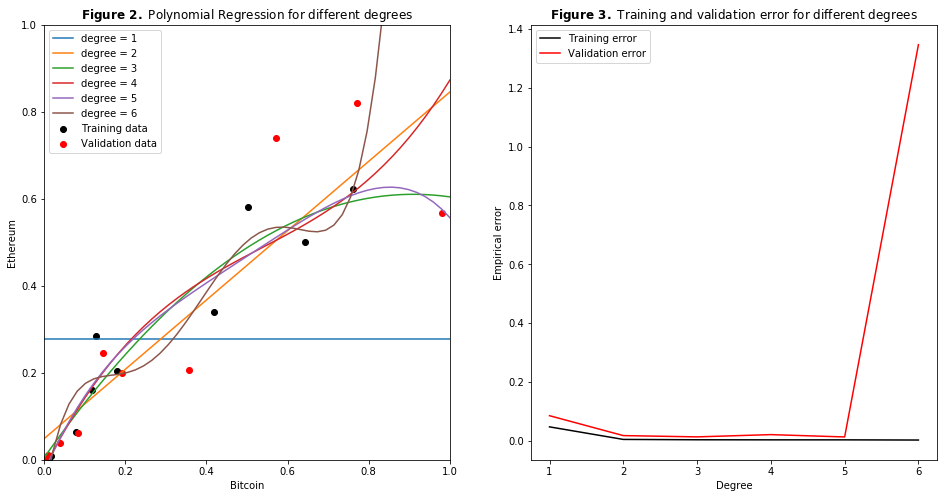

In [59]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)

plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')
for i in range(len(degrees)):
    plt.plot(np.linspace(0, 1, 50), predict(feature_mapping(np.linspace(0, 1, 50),degrees[i]),w_opts[i]), label='degree = %d' %degrees[i]) 
    
plt.title(r'$\bf{Figure\ 2.}$ Polynomial Regression for different degrees')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different degrees
ax = fig.add_subplot(122)
plt.plot(degrees,training_errors,color='black',label='Training error')
plt.plot(degrees,validation_errors,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 3.}$ Training and validation error for different degrees')
plt.ylabel('Empirical error')
plt.xlabel('Degree')
plt.xticks(degrees)
plt.legend()

plt.show()

##  3 Regularization

**Regularization** 
A "soft" variant of model selection. 

The basic idea is to regularize the empirical risk minimization problem by
- adding a term that quantifies the anticipated increase in the validation error (compared to the training error) due to the "complexity" of a particular predictor (e.g., a polynomial of high degree). 

We  have tried to find the best hypothesis space within a sequence of increasing spaces $\mathcal{H}^{(1)} \subseteq \mathcal{H}^{(2)} \subseteq \ldots \subseteq \mathcal{H}^{(d_{\rm max})}$. The space hypothesis space $\mathcal{H}^{(d)}$ is constituted by polynomials with maximum degree $d$. Indeed, the space of polynomials with maximum degree $d=1$ is a subset of the space of all polynomials with maximum degree $d=2$. 

The simple (but powerful) idea behind model selection is to use the validation errors obtained for the different hypothesis spaces and picking the one resulting in the **smallest validation error**. 

An alternative approach to model selection is to use a fixed but large hypothesis space, e..g, $\mathcal{H}^{(d_{\rm max})}$ with large degree $d_{\rm max}$, and to **regularize** the corresponding empirical risk minimization problem. The idea of regularization is to add a second term (the regularization term) to the objective function in the optimization problem that we tried to solved:

$$\hat{\mathbf{w}}^{(d)} = {\rm arg} \min_{\mathbf{w} \in \mathbb{R}^{d+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - \mathbf{w}^{T}\phi \big(x^{(i)}\big) \big)^2$$

This second terms takes into account that:
- the validation error might be larger than the training error for a highly complex predictor. 

Note that in polynomial regression, we can parametrize the predictors as $$h^{(\mathbf{w})}(x)= \mathbf{w}^{T} \phi(x) = \sum_{l=0}^{d_{\rm max}} w_{l+1} x^{l}$$ with some weight vector $\mathbf{w} \in \mathbb{R}^{d+1}$.

The entries $w_{l}$ of the weight vector $\mathbf{w}=(w_{1},\ldots,w_{d+1})^{T}$ are the coefficients of the powers $x^{0},x^{1},\ldots,x^{d}$ of the feature $x$ (e.g., the Bitcoin closing price).

It is reasonable to measure the complexity of $h^{(\mathbf{w})}$ by the average size of the coeffcients $w_{l}$. Indeed, for many large coefficients $w_{l}$, the polynomial map $h^{(\mathbf{w})}(x)$ tends to be more ''wobbly''. 

### regularized empirical risk minimization problem

In particular, we will use the squared norm $\| \mathbf{w} \|^{2}_{2} = w_{1}^{2}+\ldots+w_{d+1}^{2}$ of the weight vector for the regularization term to be added in the optimization problem above. 

This results in the following **regularized empirical risk minimization problem** 


\begin{equation}
\hat{\mathbf{w}}^{(\lambda)} = {\rm arg} \min\limits_{\mathbf{w} \in \mathbb{R}^{d_{\rm max}+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} (y^{(i)} - \mathbf{w}^{T} \phi(x^{(i)}))^{2}+\lambda \| \mathbf{w} \|^{2}_{2}.
\end{equation}

The resulting weight vector $\hat{\mathbf{w}}^{(\lambda)}$ is then used to construct a predictor $\hat{h}^{(\lambda)}$ as 

\begin{equation} 
\hat{h}^{(\lambda)}(x) = \big( \hat{\mathbf{w}}^{(\lambda)}\big)^{T} \phi(x).
\end{equation} 

The constant $\lambda \geq 0$ is a tuning parameter and controls the "effective degree" of the resulting predictor $\hat{h}^{(\lambda)}(x)$.

### Consequence of lambda value

- Using a large value of $\lambda$, results in a predictor $\hat{h}^{(\lambda)}(x)$ which resembles a polynomial of small degree (say, $d=2$). 
- In contrast, using a very small value of $\lambda$, will typically produce a predictor $\hat{h}^{(\lambda)}$ which resembles a high-degree polynomial (with $d \approx d_{\rm max}$).

In a certain sense, we replace (or approximate) the computation of the validation error of $h^{(\mathbf{w})}$  by adding the regularization term $\lambda \| \mathbf{w} \|^{2}_{2}$ to the training error in the optimization problem above. 

Indeed, the component $\lambda \| \mathbf{w} \|^{2}_{2}$ accounts for the anticipated increase in validation error due to the complexity ("wobbliness") of the predictor $h^{(\mathbf{w})}(x)= \mathbf{w}^{T} \phi(x)$. 

# Closed form of regularized empirical risk minimization problem

Similar to linear regression, we can derive a closed-form solution for the optimal weights in the **regularized empirical risk minimization problem** as

\begin{align}
\hat{\mathbf{w}}^{(\lambda)}& = \text{argmin}_{\mathbf{w} \in  \mathbb{R}^{d_{\rm max}+1}} \big[(1/N_{\rm train}) \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2} + \lambda \| \mathbf{w} \|^{2}_{2}\big] \nonumber \\[3mm] 
& = (1/N_{\rm train})( (1/N_{\rm train}) \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^{T} \mathbf{y}.
\end{align} 

Here, we used the feature matrix $\mathbf{X} = \big(\phi(x^{(2)}),\phi(x^{(4)}),\ldots,\phi(x^{(20)}) \big)^{T} \in \mathbb{R}^{10 \times (d_{\rm max}+1)}$ and the label vector $\mathbf{y}=\big(y^{(2)},y^{(4)},\ldots,y^{(20)}\big)^{T} \in \mathbb{R}^{10}$.

In [50]:
def regularizedFit(X, y,l=0):
    N=X.shape[0]
    w_opt = 1/N*np.dot(np.dot(np.linalg.inv(1/N*np.dot(np.transpose(X), X)+l*np.eye(X.shape[1])),np.transpose(X)), y)
    return w_opt

It remains to specify the choice of the regularization parameter $\lambda$ 

One option is to try out different values for $\lambda$, compute the weight vector $\hat{\mathbf{w}}^{(\lambda)}$ by solving the problem (regularized opti prob) and evaluate the validation error of the corresponding predictor $h^{(\lambda)}$:

\begin{equation}
E_{\rm val}^{(\lambda)} = (1/N_{\rm val}) \sum_{i=1,3,\ldots,19} (y^{(i)} - \mathbf{w}^{T} \phi(x^{(i)}))^{2}.
\end{equation} 

We then pick the value for $\lambda$ which results in the smallest validation error $E_{\rm val}^{(\lambda)}$.

In [51]:
# add a lambda to the standard regression

def regularizedPolynomialRegression(x, y, l=0,degree=2):
    X = feature_mapping(x,degree)
    w_opt=regularizedFit(X,y,l)
    return w_opt

In [52]:
def trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas=[0],degree=2):
    #compute the optimal weight, training and validation error for each lambda
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for l in lambdas:
        w_opt=regularizedPolynomialRegression(x_train, y_train, l,degree)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,degree),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,degree),y_val,w_opt))
    return w_opts, training_errors,validation_errors

,Lambdas,Training errors,Validation errors
0,0.00,0.002970,1.346183
1,0.01,0.006321,0.021683
2,0.10,0.014078,0.032406
3,0.50,0.033803,0.056465
4,1.00,0.048999,0.076654
5,5.00,0.092993,0.131519


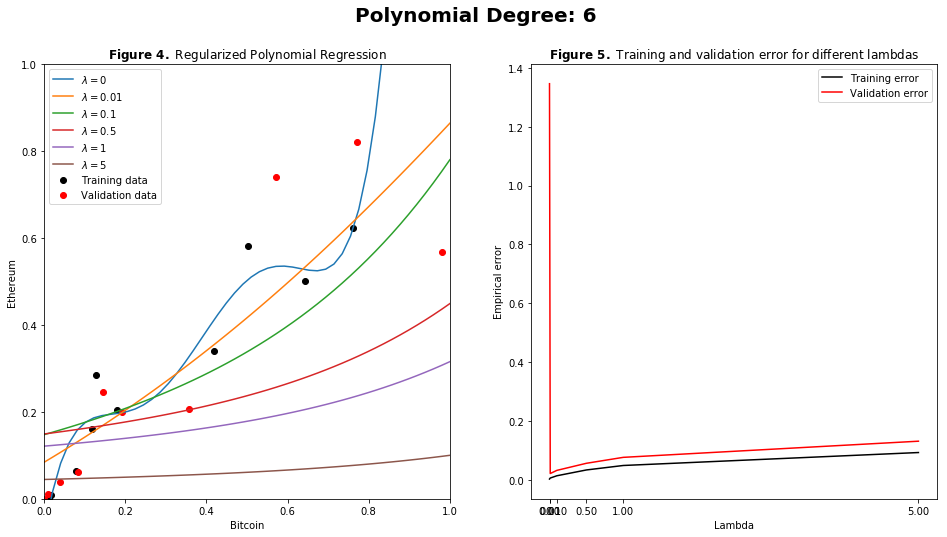

In [60]:
#specify the degree
degree=6
#specify list of values for lambda to be considered
lambdas = [0, 0.01, 0.1, 0.5, 1, 5] 

#compute the training and validation errors and display them
w_opts_reg, training_errors_reg, validation_errors_reg = trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas,degree=degree)
df_lambdas=pd.DataFrame(data={'Lambdas':lambdas,'Training errors':training_errors_reg,'Validation errors':validation_errors_reg})
display(df_lambdas)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')

for i in range(len(lambdas)):
    plt.plot(np.linspace(0, 1, 50), predict(feature_mapping(np.linspace(0, 1, 50),degree),w_opts_reg[i]), label='$ \lambda=%s$' %str(lambdas[i])) 

fig.suptitle(f'Polynomial Degree: {degree}', fontsize=20, fontweight='bold')  
    
plt.title(r'$\bf{Figure\ 4.}$ Regularized Polynomial Regression')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different values of lambda
ax=fig.add_subplot(122)
plt.plot(lambdas,training_errors_reg,color='black',label='Training error')
plt.plot(lambdas,validation_errors_reg,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 5.}$ Training and validation error for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Empirical error')
plt.xticks(lambdas)
plt.legend()
plt.show()
